In [1]:

import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import glob
import numpy as np
import random
from tqdm import tqdm

In [11]:
SR = 16000
MAX_FILES = 500
SAMPLE_SIZE = 200

all_files = glob.glob("recordings/*.wav")[:MAX_FILES]

random.seed(42)
sample_files = random.sample(all_files, SAMPLE_SIZE)

signals, labels = [], []

for f in tqdm(sample_files, desc="Loading audio files"):
    try:
        y, _ = librosa.load(f, sr=SR)
        y = y[:SR * 1]
        signals.append(y)
        label = f.split("\\")[-1].split("_")[0] if "\\" in f else f.split("/")[-1].split("_")[0]
        labels.append(label)
    except Exception as e:
        print(f"Skipping {f} due to error: {e}")

noisy_signals, noisy_labels = [], []

for i, y in enumerate(signals):
    noise = np.random.randn(len(y)).astype(np.float32) * 0.03
    noisy_signals.append(y + noise)
    noisy_labels.append(labels[i] + "_noisy")

signals.extend(noisy_signals)
labels.extend(noisy_labels)

print(f"\nLoaded {len(signals)} audio samples successfully!")

Loading audio files:   0%|          | 0/200 [00:00<?, ?it/s]

Loading audio files: 100%|██████████| 200/200 [00:00<00:00, 1220.41it/s]



Loaded 400 audio samples successfully!


In [12]:

def extract_mfcc(sig, sr=16000):
    mfcc = librosa.feature.mfcc(y=sig, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)

X = np.array([extract_mfcc(s) for s in signals])
y = np.array(labels)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9166666666666666


c:\Users\chidi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


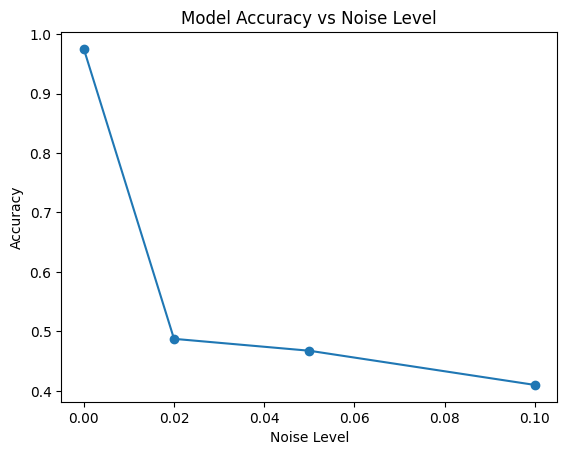

In [14]:

def add_noise(sig, noise_factor):
    noise = np.random.randn(len(sig)) * noise_factor
    return sig + noise

noise_levels = [0, 0.02, 0.05, 0.1]
accuracies = []

for nf in noise_levels:
    noisy = [add_noise(s, nf) for s in signals]
    Xn = np.array([extract_mfcc(s) for s in noisy])
    yn = model.predict(Xn)
    accuracies.append(accuracy_score(y, yn))

plt.plot(noise_levels, accuracies, marker='o')
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs Noise Level")
plt.show()
